In [78]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [79]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [80]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [81]:
sdir  = '/data/tjarniko/results/BR_1st_2015/ncs/'
t_ncU = 'SKOG_1d_20150101_20150130_dian_U_20150101-20150101.nc'
t_ncG = 'SKOG_1d_20150101_20150130_grid_T_20150101-20150101.nc'

t_testU = nc.Dataset(sdir+t_ncU)
t_testG = nc.Dataset(sdir+t_ncG)
# print(t_testU)
# print('*')
# print(t_testG)
#print(t_testU['depthu_bounds'][10,:])

In [82]:
TA_UT = t_testU['TA_UT']
DIC_UT = t_testU['DIC_UT']
print(np.shape(TA_UT))

(1, 40, 898, 398)


In [83]:
TA_UT_jdfmouth = TA_UT[:,:,:,5]
print(np.shape(TA_UT_jdfmouth))
TA_UT_jdfmouth2d = np.squeeze(TA_UT_jdfmouth)
print(np.shape(TA_UT_jdfmouth2d))

print(np.sum(TA_UT_jdfmouth2d))


(1, 40, 898)
(40, 898)
1.58447e+08


# What is being calculated?

Code from NEMO:

         IF( iom_use( cltraU )) THEN ! calculate u-dir transport
            z3d(:,:,:) = 0.e0
            DO jk = 1, jpkm1
               DO jj = 2, jpjm1
                  DO ji = 2, jpim1   ! vector opt.
                     z3d(ji,jj,jk) = un(ji,jj,jk) * e2u(ji,jj) * fse3u_n(ji,jj,jk) * &
                        & umask(ji,jj,jk) * ( trn(ji,jj,jk,jn) + trn(ji+1,jj,jk,jn) )
                  END DO
               END DO
            END DO
            CALL lbc_lnk( z3d, 'U', -1. )
            CALL iom_put( cltraU , 0.5 * z3d )
         ENDIF

    What I think the variables are:
    
    ?: un(ji,jj,jk) is velocity? m/s
    
    YES: e2u is grid spacing on u grid in v direction (m)
    
    ? fse3u_n: would this be the depth of the given grid cell? 
                multiplying the above two together would give me an area. 
    
    ? umask(ji,jj,jk): a mask?
    
    trn(ji,jj,jk,jn) + trn(ji+1,jj,jk,jn) - tracer concentration at 2 adjacent i-points. (This explains the 0.5 * z3d)
    (units mmol/m3)
    
    BOE calc of pure value - velocity 2 m/s, grid spacing in v dir 500 m, depth of grid cell 10m, concentration 2000
    gives 20,000,000 mmol/s in a given grid cell. 
    
    

    

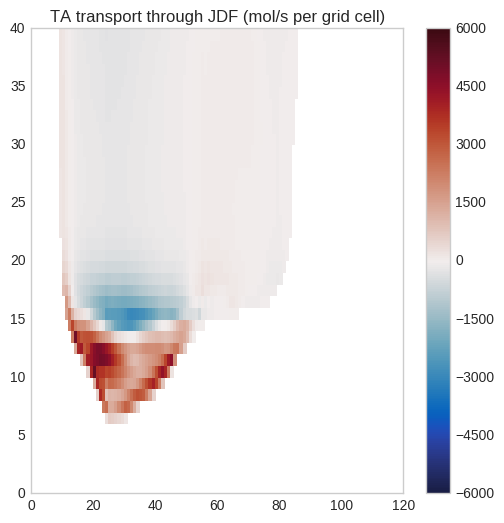

In [84]:
fig = plt.figure(figsize=(6,6))
nop = 1
for i in range(1,nop+1):
    ax = fig.add_subplot(1,1,i)
    sd = np.flipud(TA_UT_jdfmouth2d[:,380:490])/1000
    tplt = np.ma.masked_values(sd,0)
    mesh = ax.pcolormesh(tplt, cmap=cm.cm.balance, vmin=-6000, vmax=6000)
    cbar = fig.colorbar(mesh, ax=ax)
    plt.title('TA transport through JDF (mol/s per grid cell)')

In [85]:
#spinup year
start = '2015-01-01'
end = '2015-12-31'

st = dt.datetime(2015,1,1)
en = dt.datetime(2015,12,31)

y_st = st.timetuple().tm_yday
print(y_st)
y_en = en.timetuple().tm_yday
print(y_en)
ts_BR = np.arange(y_st,y_en+1,1)

#2015 year 2
start2 = '2015-01-01'
end2 = '2015-03-27'

st2 = dt.datetime(2015,1,1)
en2 = dt.datetime(2015,3,27)
y_st2 = st2.timetuple().tm_yday
print(y_st2)
y_en2 = en2.timetuple().tm_yday
print(y_en2)
ts_RR = np.arange(y_st2,y_en2+1,1)

#2015 year 2B
start2B = '2015-05-01'
end2B = '2015-06-29'

st2B = dt.datetime(2015,5,1)
en2B = dt.datetime(2015,6,29)
y_st2B = st2B.timetuple().tm_yday
print(y_st2B)
y_en2B = en2B.timetuple().tm_yday
print(y_en2B)
ts_RRB = np.arange(y_st2B,y_en2B+1,1)

#PI year
start3 = '2015-01-01'
end3 = '2015-12-31'

st3 = dt.datetime(2015,1,1)
en3 = dt.datetime(2015,12,31)
y_st3 = st3.timetuple().tm_yday
print(y_st3)
y_en3 = en3.timetuple().tm_yday
print(y_en3)
ts_PI = np.arange(y_st3,y_en3+1,1)


bdir = '/results2/SalishSea/hindcast.201812_annex/'
sdir = '/data/tjarniko/results/BR_1st_2015/ncs/'
sdir2 = '/data/tjarniko/results/BR_2nd_2015/ncs/'
sdir3 = '/data/tjarniko/results/PREIND_1st_2015/ncs/'

thalweg_file='/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

figstring = 'BR2015'

1
365
1
86
121
180
1
365


In [86]:
def make_nclen(start,end,ftype, sdir):
    base_ar = []
    sens_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        nc_sens = sdir + '/SKOG_1d_*'+ ftype +'_U_' + ymd + '-' + ymd + '.nc'
        tnc_sens = glob.glob(nc_sens)
        sens_ar.append(tnc_sens[0])
        
    return sens_ar

In [87]:
BR_ar = make_nclen(start,end,'dian', sdir)
BR_ar2 = make_nclen(start2,end2,'dian', sdir2)
BR_ar2B = make_nclen(start2B,end2B,'dian', sdir2)
PI_ar = make_nclen(start3,end3,'dian', sdir3)


In [88]:
def calculate_transports(files):
    stor_trans = np.zeros(len(files))

    i = 0
    for f in files:
        if i%50 == 0:
            print(i)
        G = nc.Dataset(f)
        var_tmp = G.variables['DIC_UT'][:,:,:,5]
        var_tmp[var_tmp == 1e+20] = 0
        var_tmp2 = np.sum(var_tmp)
        stor_trans[i] = var_tmp2
        i = i+1

    return stor_trans

In [89]:
def calculate_transports_surface(files):
    stor_trans = np.zeros(len(files))

    i = 0
    for f in files:
        if i%50 == 0:
            print(i)
        G = nc.Dataset(f)
        var_tmp = G.variables['DIC_UT'][:,0:5,:,5]
        var_tmp[var_tmp == 1e+20] = 0
        var_tmp2 = np.sum(var_tmp)
        stor_trans[i] = var_tmp2
        i = i+1

    return stor_trans

In [90]:
stor_transBR = calculate_transports(BR_ar)
stor_transBR2 = calculate_transports(BR_ar2)
stor_transBR2B = calculate_transports(BR_ar2B)
stor_transPI = calculate_transports(PI_ar)

stor_transBR_surf5 = calculate_transports_surface(BR_ar)
stor_transBR2_surf5 = calculate_transports_surface(BR_ar2)
stor_transBR2B_surf5 = calculate_transports_surface(BR_ar2B)
stor_transPI_surf5 = calculate_transports_surface(PI_ar)

0


/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


50
100
150
200
250
300
350
0
50
0
50
0
50
100
150
200
250
300
350
0
50
100
150
200
250
300
350
0
50
0
50
0
50
100
150
200
250
300
350


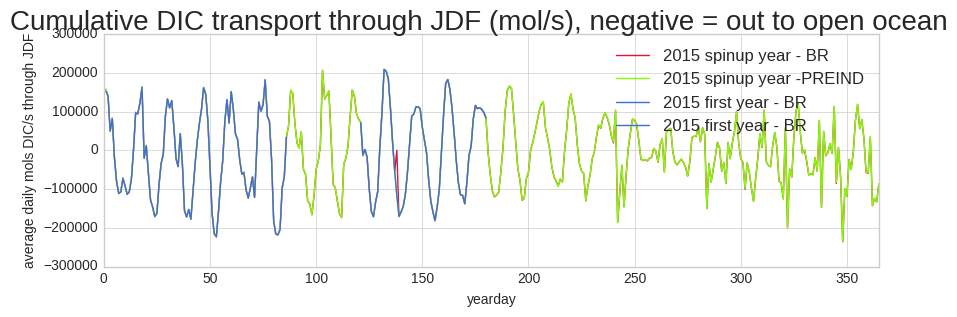

In [91]:
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,1,1)
ax.plot(ts_BR,stor_transBR/1000,color = 'crimson',label = '2015 spinup year - BR')

ax.plot(ts_PI,stor_transPI/1000,color = 'chartreuse', label = '2015 spinup year -PREIND')
ax.plot(ts_RR,stor_transBR2/1000,color = 'royalblue',  label = '2015 first year - BR')
ax.plot(ts_RRB,stor_transBR2B/1000,color = 'royalblue',  label = '2015 first year - BR')
ax.legend(loc = 'best')
plt.ylabel('average daily mols DIC/s through JDF')
plt.xlabel('yearday')
plt.xlim([0,365])

fig.suptitle('Cumulative DIC transport through JDF (mol/s), negative = out to open ocean', fontsize = 20)
plt.show()




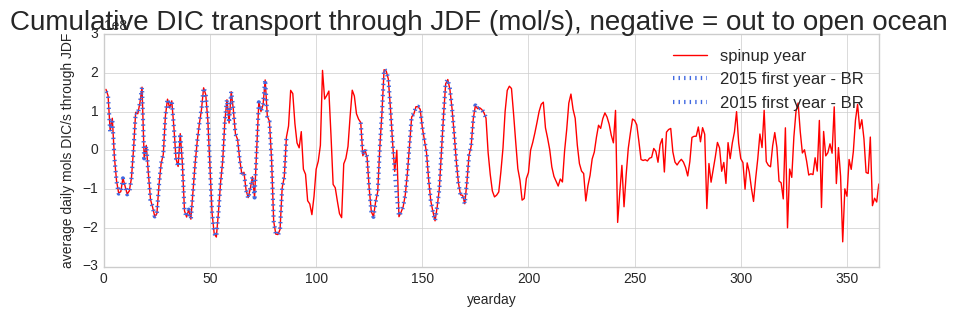

In [92]:
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,1,1)

ax.plot(ts_BR,stor_transBR, color = 'red', label = 'spinup year')
ax.plot(ts_RRB,stor_transBR2B,color = 'royalblue', linestyle = ':', linewidth = 3, label = '2015 first year - BR')
ax.plot(ts_RR,stor_transBR2,color = 'royalblue', linestyle = ':', linewidth = 3, label = '2015 first year - BR')

ax.legend(loc = 'best')
plt.ylabel('average daily mols DIC/s through JDF')
plt.xlabel('yearday')
plt.xlim([0,365])

fig.suptitle('Cumulative DIC transport through JDF (mol/s), negative = out to open ocean', fontsize = 20)
plt.show()




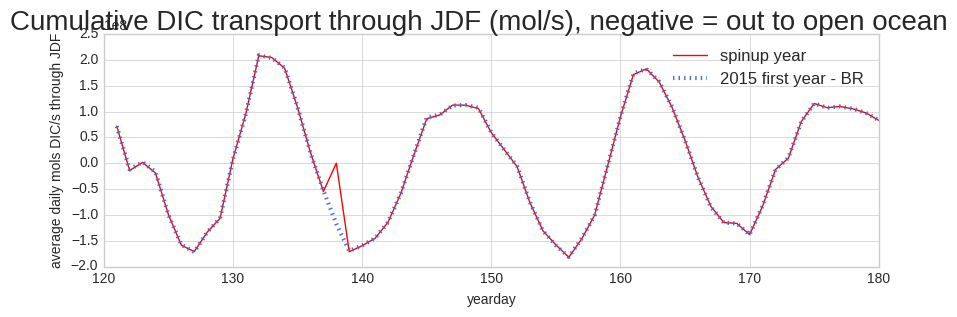

In [93]:
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,1,1)

ax.plot(ts_BR[120:180],stor_transBR[120:180], color = 'red', label = 'spinup year')
ax.plot(ts_RRB,stor_transBR2B,color = 'royalblue', linestyle = ':', \
       linewidth = 3, label = '2015 first year - BR')

ax.legend(loc = 'best')
plt.ylabel('average daily mols DIC/s through JDF')
plt.xlabel('yearday')
plt.xlim([120,180])

fig.suptitle('Cumulative DIC transport through JDF (mol/s), negative = out to open ocean', fontsize = 20)
plt.show()




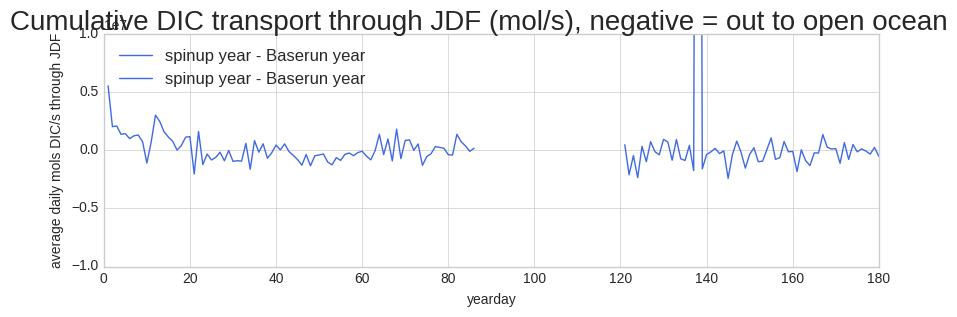

In [94]:
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,1,1)
ax.plot(ts_BR[0:86],stor_transBR[0:86]-stor_transBR2, color = 'royalblue', label = 'spinup year - Baserun year')
ax.plot(ts_BR[120:180],stor_transBR[120:180]-stor_transBR2B, color = 'royalblue', label = 'spinup year - Baserun year')
#ax.plot(ts_RRB,stor_transBR2B,color = 'royalblue', linestyle = ':', \
 #      linewidth = 3, label = '2015 first year - BR')

ax.legend(loc = 'best')
plt.ylabel('average daily mols DIC/s through JDF')
plt.xlabel('yearday')
plt.ylim([-10000000,10000000])

fig.suptitle('Cumulative DIC transport through JDF (mol/s), negative = out to open ocean', fontsize = 20)
plt.show()




In [95]:
len(stor_transBR[0:87])

87